Correlation heatmap, boxplot for top15 descriptors for all the compounds and interaction heatmaps

In [ ]:
%cd "F:\Ishani\Modeling"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
pd.set_option("display.max_columns", 50)
import pickle

In [36]:
df = pd.read_csv('top15.csv')  ### 'top15.csv' is the scaled data (obtained by StandardScaler)
df

,Unnamed: 0,Dmean,SP-3,SP-4,SP-5,MPC2,MPC3,MPC4,piPC2,MWC2,MWC3,MWC4,MWC5,MWC6,SRW4,SRW6,SRW8
0,0,-5.133333,-1.519081,-1.492325,-1.572359,-1.311430,-1.386087,-1.352232,-1.917101,-1.848321,-1.715824,-1.511380,-1.396369,-1.246499,-1.779775,-1.490962,-1.238139
1,1,-7.166667,0.121174,0.353562,0.413567,0.042838,0.297559,0.488825,0.676132,0.293827,0.367889,0.407191,0.476098,0.519325,0.287354,0.345925,0.433435
2,2,-6.833333,-0.411270,-0.261189,-0.213524,-0.425947,-0.347242,-0.257550,0.425554,-0.212739,-0.149046,-0.115285,-0.073624,-0.047616,-0.203288,-0.129398,-0.053198
3,3,-10.466667,3.183387,3.203311,2.988593,3.115985,3.270808,3.225531,1.283518,1.915624,1.881698,1.864332,1.816731,1.791416,1.913553,1.900492,1.862692
4,4,-5.800000,-1.090664,-1.001239,-0.930849,-1.155169,-1.027865,-0.954166,-0.615916,-1.320587,-1.203171,-1.164735,-1.079032,-1.046258,-1.312997,-1.185267,-1.030007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,1600,-5.400000,-0.850379,-0.851342,-0.795654,-0.946819,-0.848753,-0.829770,-0.943090,-0.909358,-0.830303,-0.820493,-0.761644,-0.750284,-0.907903,-0.831830,-0.742739
1601,1601,-6.100000,0.144767,0.285197,0.179749,0.511623,0.010981,-0.008758,0.545633,0.736438,0.554370,0.464264,0.334547,0.265639,0.701732,0.468160,0.250440
1602,1602,-9.466667,1.378262,1.630825,1.699958,1.761717,1.802094,2.031331,1.325495,1.283284,1.314469,1.411172,1.429504,1.485286,1.314855,1.438758,1.508055
1603,1603,-3.600000,-1.541582,-1.611962,-1.624866,-1.519779,-1.529377,-1.501507,-2.532610,-2.343927,-2.398808,-2.338632,-2.366508,-2.296823,-2.334124,-2.240016,-2.142437


In [37]:
df = df.drop('Unnamed: 0', axis = 1)
df

,Dmean,SP-3,SP-4,SP-5,MPC2,MPC3,MPC4,piPC2,MWC2,MWC3,MWC4,MWC5,MWC6,SRW4,SRW6,SRW8
0,-5.133333,-1.519081,-1.492325,-1.572359,-1.311430,-1.386087,-1.352232,-1.917101,-1.848321,-1.715824,-1.511380,-1.396369,-1.246499,-1.779775,-1.490962,-1.238139
1,-7.166667,0.121174,0.353562,0.413567,0.042838,0.297559,0.488825,0.676132,0.293827,0.367889,0.407191,0.476098,0.519325,0.287354,0.345925,0.433435
2,-6.833333,-0.411270,-0.261189,-0.213524,-0.425947,-0.347242,-0.257550,0.425554,-0.212739,-0.149046,-0.115285,-0.073624,-0.047616,-0.203288,-0.129398,-0.053198
3,-10.466667,3.183387,3.203311,2.988593,3.115985,3.270808,3.225531,1.283518,1.915624,1.881698,1.864332,1.816731,1.791416,1.913553,1.900492,1.862692
4,-5.800000,-1.090664,-1.001239,-0.930849,-1.155169,-1.027865,-0.954166,-0.615916,-1.320587,-1.203171,-1.164735,-1.079032,-1.046258,-1.312997,-1.185267,-1.030007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,-5.400000,-0.850379,-0.851342,-0.795654,-0.946819,-0.848753,-0.829770,-0.943090,-0.909358,-0.830303,-0.820493,-0.761644,-0.750284,-0.907903,-0.831830,-0.742739
1601,-6.100000,0.144767,0.285197,0.179749,0.511623,0.010981,-0.008758,0.545633,0.736438,0.554370,0.464264,0.334547,0.265639,0.701732,0.468160,0.250440
1602,-9.466667,1.378262,1.630825,1.699958,1.761717,1.802094,2.031331,1.325495,1.283284,1.314469,1.411172,1.429504,1.485286,1.314855,1.438758,1.508055
1603,-3.600000,-1.541582,-1.611962,-1.624866,-1.519779,-1.529377,-1.501507,-2.532610,-2.343927,-2.398808,-2.338632,-2.366508,-2.296823,-2.334124,-2.240016,-2.142437


### Heatmap generation

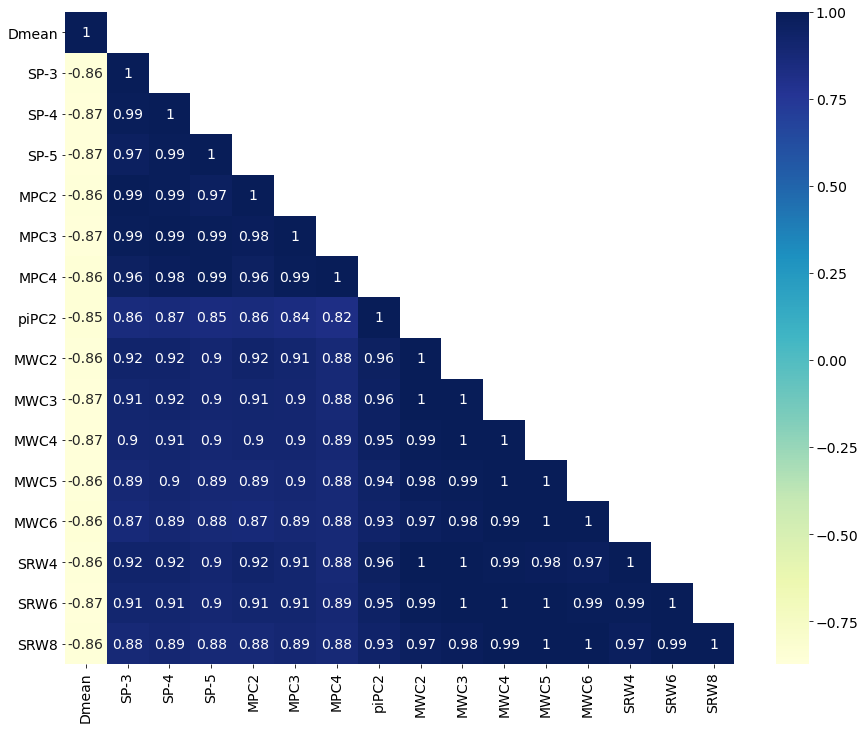

In [38]:
fig, ax = plt.subplots(figsize=(15,12))

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal'
        }

matrix = np.triu(df.corr(), 1)

res = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', annot_kws={'size': 14}, mask=matrix)

res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
cbar = res.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=14)
#plt.title('Correlation Heatmap', fontsize = 24, fontweight = 'bold' )

plt.savefig(r"F:\Ishani\Modeling\Images\Heatmap.tiff", dpi=600)

### top 15 descriptor distribution

In [31]:
df = pd.read_excel('top15descriptors.xlsx')  ### Top 15 descriptors for all the compounds
df.head()

,Name,Docking Name,ZINC ID,Docking 1,Docking 2,Docking 3,Dmean,Dstd,(Dstd/abs(Dmean))*100,SP-4,SP-5,MPC3,SRW6,MWC4,MWC3,SP-3,MPC2,SRW4,MPC4,MWC5,MWC2,SRW8,MWC6,piPC2
0,ligand1354,top_docking1,ZINC000169289388,-12.6,-12.6,-12.6,-12.600000,0.000000,0.000000,17.7004,13.2531,124,7.775276,7.522400,6.645091,23.754528,96,6.255750,146,8.388223,5.796058,9.378648,9.267760,4.762174
1,ligand897,top_docking2,ZINC000096006020,-12.3,-12.1,-12.0,-12.133333,0.152753,1.258949,20.4080,17.7761,151,7.961021,7.704812,6.755769,24.581068,105,6.336826,210,8.647695,5.849325,9.692581,9.611463,4.993828
2,ligand661,top_docking3,ZINC000085537053,-12.1,-11.6,-12.1,-11.933333,0.288675,2.419065,19.0974,15.6736,140,7.916807,7.653020,6.693324,22.625978,100,6.282267,195,8.591373,5.789960,9.654449,9.562053,4.882802
3,ligand1249,top_docking4,ZINC000169621228,-11.6,-11.6,-11.5,-11.566667,0.057735,0.499150,19.3266,15.3139,140,7.852828,7.622175,6.710523,24.859690,101,6.293419,182,8.529319,5.826000,9.503383,9.449593,4.959342
4,ligand97,top_docking5,ZINC000052955754,-11.5,-11.5,-11.5,-11.500000,0.000000,0.000000,17.0275,14.4919,118,7.652071,7.438972,6.481577,18.594715,79,6.033086,176,8.383662,5.556828,9.370502,9.347054,4.751433


In [10]:
df.columns


Index(['Name', 'Docking Name', 'ZINC ID', 'Docking 1', 'Docking 2',
       'Docking 3', 'Dmean', 'Dstd', '(Dstd/abs(Dmean))*100', 'SP-4', 'SP-5',
       'MPC3', 'SRW6', 'MWC4', 'MWC3', 'SP-3', 'MPC2', 'SRW4', 'MPC4', 'MWC5',
       'MWC2', 'SRW8', 'MWC6', 'piPC2'],
      dtype='object')

In [32]:
df = df[['SP-4', 'SP-5',
       'MPC3', 'SRW6', 'MWC4', 'MWC3', 'SP-3', 'MPC2', 'SRW4', 'MPC4', 'MWC5',
       'MWC2', 'SRW8', 'MWC6', 'piPC2']]
names = ['SP-4', 'SP-5',
       'MPC3', 'SRW6', 'MWC4', 'MWC3', 'SP-3', 'MPC2', 'SRW4', 'MPC4', 'MWC5',
       'MWC2', 'SRW8', 'MWC6', 'piPC2']
df.head()

,SP-4,SP-5,MPC3,SRW6,MWC4,MWC3,SP-3,MPC2,SRW4,MPC4,MWC5,MWC2,SRW8,MWC6,piPC2
0,17.7004,13.2531,124,7.775276,7.522400,6.645091,23.754528,96,6.255750,146,8.388223,5.796058,9.378648,9.267760,4.762174
1,20.4080,17.7761,151,7.961021,7.704812,6.755769,24.581068,105,6.336826,210,8.647695,5.849325,9.692581,9.611463,4.993828
2,19.0974,15.6736,140,7.916807,7.653020,6.693324,22.625978,100,6.282267,195,8.591373,5.789960,9.654449,9.562053,4.882802
3,19.3266,15.3139,140,7.852828,7.622175,6.710523,24.859690,101,6.293419,182,8.529319,5.826000,9.503383,9.449593,4.959342
4,17.0275,14.4919,118,7.652071,7.438972,6.481577,18.594715,79,6.033086,176,8.383662,5.556828,9.370502,9.347054,4.751433


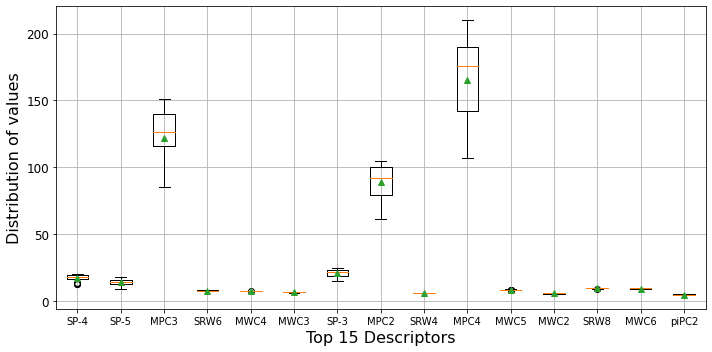

In [34]:
plt.figure(figsize=(10,5))

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
plt.grid()
plt.boxplot(df, labels=names, showmeans=True)
plt.ylabel('Distribution of values', fontdict=font)
plt.xlabel('Top 15 Descriptors', fontdict=font)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(r'F:\Ishani\Modeling\Images\top15_distribution.tiff', dpi = 600)

### Interaction heatmaps

In [3]:
df = pd.read_excel('Heatmap.xlsx') # 'Heatmap.xlsx' contains all the counted protein-ligand interactions 
df

,Unnamed: 0,ZINC000169289388,ZINC000096006020,ZINC000085537053,ZINC000169621228,ZINC000052955754,ZINC000203757351,ZINC000169621219,ZINC000169289767,ZINC000003978005,ZINC000003932831,ZINC000085536932,ZINC000253630390,ZINC000012503187,ZINC000164528615,ZINC000169344691,ZINC000253387843,ZINC000242548690,ZINC000169621220,ZINC000053683151,ZINC000008220909,Remdesivir,HCQ
0,Conventional Hydrogen Bond,1.0,1.0,3.0,2.0,2.0,2.0,NaN,3.0,2.0,2.0,3.0,1.0,1.0,3.0,NaN,2.0,4.0,2.0,3.0,1.0,1.0,NaN
1,Van der waals,9.0,14.0,9.0,9.0,10.0,14.0,10.0,12.0,7.0,9.0,8.0,10.0,9.0,13.0,7.0,13.0,13.0,11.0,10.0,11.0,13.0,9.0
2,Carbon Hydrogen Bond,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,5.0,NaN,1.0,1.0,NaN,1.0,NaN
3,Pi-Donor Hydrogen Bond,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,Pi-sigma,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5,Pi-cation,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Pi-Pi-T-shaped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Pi-Pi stacked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
8,Alkyl,5.0,NaN,2.0,1.0,NaN,2.0,1.0,4.0,1.0,4.0,2.0,4.0,4.0,1.0,2.0,NaN,6.0,1.0,NaN,NaN,3.0,2.0
9,Pi-Alkyl,2.0,2.0,1.0,5.0,5.0,4.0,4.0,3.0,3.0,4.0,NaN,NaN,2.0,4.0,3.0,NaN,1.0,NaN,1.0,1.0,3.0,3.0


In [4]:
df.set_index('Unnamed: 0',inplace=True )

In [5]:
df.fillna(0, inplace=True)

In [6]:
df.astype(int)

,ZINC000169289388,ZINC000096006020,ZINC000085537053,ZINC000169621228,ZINC000052955754,ZINC000203757351,ZINC000169621219,ZINC000169289767,ZINC000003978005,ZINC000003932831,ZINC000085536932,ZINC000253630390,ZINC000012503187,ZINC000164528615,ZINC000169344691,ZINC000253387843,ZINC000242548690,ZINC000169621220,ZINC000053683151,ZINC000008220909,Remdesivir,HCQ
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,
Conventional Hydrogen Bond,1,1,3,2,2,2,0,3,2,2,3,1,1,3,0,2,4,2,3,1,1,0
Van der waals,9,14,9,9,10,14,10,12,7,9,8,10,9,13,7,13,13,11,10,11,13,9
Carbon Hydrogen Bond,0,0,0,2,0,0,1,1,1,0,0,0,0,0,1,5,0,1,1,0,1,0
Pi-Donor Hydrogen Bond,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
Pi-sigma,0,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0
Pi-cation,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Pi-Pi-T-shaped,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Pi-Pi stacked,0,0,0,0,0,0,0,0,1,1,2,4,1,0,0,0,0,0,1,0,0,0
Alkyl,5,0,2,1,0,2,1,4,1,4,2,4,4,1,2,0,6,1,0,0,3,2


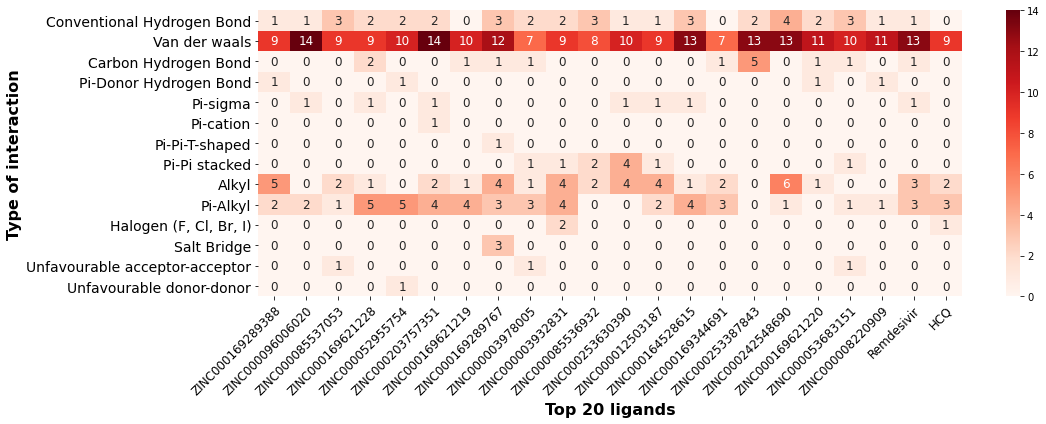

In [7]:
fig, ax = plt.subplots(figsize=(16,6))

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
res = sns.heatmap(df, annot=True, cmap=plt.cm.Reds, annot_kws={'size': 12})
plt.ylabel('Type of interaction', fontdict=font, fontsize=16, fontweight='bold')
plt.xlabel('Top 20 ligands', fontdict=font, fontsize=16, fontweight='bold')

res.set_xticklabels(res.get_xmajorticklabels(), fontsize=12, rotation=45, ha="right", rotation_mode='anchor')
res.set_yticklabels(res.get_ymajorticklabels(), fontdict=font)

plt.tight_layout()

plt.savefig(r'F:\Ishani\Modeling\Images\top20_ligand_interaction_heatmap.tiff', dpi = 600)